 ### 1) Frailty is physical weakness; lack of health or strength. Reduced grip strength in females correlated with higher frailty scores and vice versa. Hand grip strength can be quantified by measuring the amount of static force that the hand can squeeze around a dynamometer. The force has most commonly been measured in kilograms and pounds. The table below represents data from 10 female participants. The Height is measured in inches, Weight in pounds, Age in years, Grip strength in kilograms. Frailty is qualitative attribute indicated the presence or absence of the symptoms. Based on the following table,design the three stages of reproducible workflow, includes the work you can do and the folder structure in each stage.

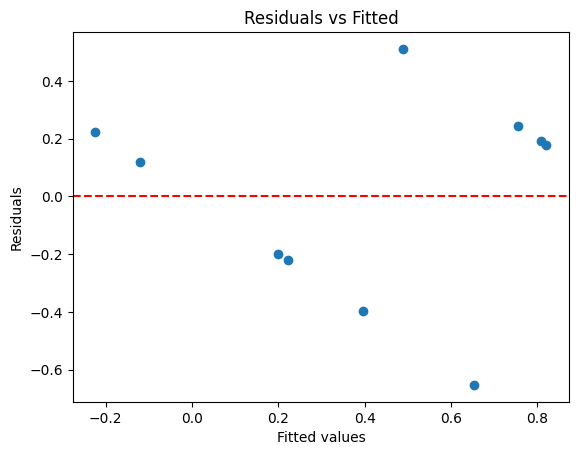

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                Frailty   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     3.949
Date:                Tue, 13 Feb 2024   Prob (F-statistic):             0.0711
Time:                        03:50:48   Log-Likelihood:                -3.2769
No. Observations:                  10   AIC:                             12.55
Df Residuals:                       7   BIC:                             13.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Grip Strength    -0.0564      0.030     -1.906

('/content/drive/MyDrive/clean_yield_data.csv',
 '/content/drive/MyDrive/result.txt')

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Reading the Data
input_data = pd.read_csv('/content/drive/MyDrive/frailty data.csv')

# Step 2: removing NA values
input_data = input_data.dropna()

# Step 3: Cleaning Data - Converting 'Frailty' from 'Y'/'N' to 1/0
input_data['Frailty'] = np.where(input_data['Frailty'] == 'Y', 1, 0)

# Step 4: Writing the cleaned data to a new CSV file
clean_data_path = '/content/drive/MyDrive/clean_yield_data.csv'
input_data.to_csv(clean_data_path, index=False)


# Step 6: Analysis - Linear regression
# Adding a constant term for intercept
input_data['Intercept'] = 1

# Specifying the independent variables and the dependent variable
X = input_data[['Grip Strength', 'weight', 'Intercept']]
y = input_data['Frailty']

# Fitting the model
lm_fit = sm.OLS(y, X).fit()

# Step 7: Plotting the linear model fit
plt.scatter(lm_fit.predict(), lm_fit.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Step 8: Summarizing the linear model fit and writing the summary to a text file
result_text = lm_fit.summary().as_text()

result_path = '/content/drive/MyDrive/result.txt'
with open(result_path, 'w') as file:
    file.write(result_text)

# Output the summary result to the console
print(result_text)

# Return the paths to the cleaned data CSV and result text file
clean_data_path, result_path